In [93]:
import random
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [94]:
# Import data
time_series_data = pd.read_csv('time_series_model_feature_importance.csv', index_col=0, sep=';')
regression_data = pd.read_csv('regression_model_feature_importance.csv', index_col=0, sep=';')
mlp_data = pd.read_csv('mlp_model_feature_importance.csv', index_col=0, sep=';')

In [95]:
time_series_data.head()

""
rmse
4.610456


In [96]:
regression_data.head()

,feature_importance_values,original_order,rmse
feature_names,,,
volsw_123,-0.000123,22,0.934819
YYYY,0.000049,0,0.934819
lai_low_veg,0.000106,14,0.934819
volsw_4,0.000450,23,0.934819
fcst_alb,0.000725,12,0.934819


In [97]:
mlp_data.head()

,feature_importance_values,original_order,rmse
feature_names,,,
YYYY,-0.000013,0,0.914403
DD,0.000053,2,0.914403
MM,0.000293,1,0.914403
volsw_4,0.000914,23,0.914403
lai_low_veg,0.001047,14,0.914403


In [98]:
# Sort data to original order by column name original_order
regression_data = regression_data.sort_values(by=['original_order'])
mlp_data = mlp_data.sort_values(by=['original_order'])
regression_data.head()

,feature_importance_values,original_order,rmse
feature_names,,,
YYYY,0.000049,0,0.934819
MM,11.558884,1,0.934819
DD,0.076905,2,0.934819
DOY,11.994408,3,0.934819
2m_temp_max,0.030829,4,0.934819


In [99]:
mlp_data.head()

,feature_importance_values,original_order,rmse
feature_names,,,
YYYY,-0.000013,0,0.914403
MM,0.000293,1,0.914403
DD,0.000053,2,0.914403
DOY,0.006354,3,0.914403
2m_temp_max,0.012413,4,0.914403


# Normalize 
Normalize each feature importance value to be between 0 and 1


In [100]:
from sklearn.preprocessing import StandardScaler
# Extract the feature importance values for normalization
importance_values = regression_data['feature_importance_values'].values.reshape(-1, 1)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the feature importance values
normalized_values = scaler.fit_transform(importance_values).flatten()

# Update the DataFrame with normalized values
regression_data['normalized_importance_values'] = normalized_values

# Get lowest normalized feature importance value
print(regression_data['normalized_importance_values'].min())

# To each normalized feature value add minimal value to make each value positive
regression_data['normalized_importance_values'] = regression_data['normalized_importance_values'] + abs(regression_data['normalized_importance_values'].min())

print(regression_data['normalized_importance_values'].min())


-0.2936979639982913
0.0


In [101]:
# Extract the feature importance values for normalization
importance_values = mlp_data['feature_importance_values'].values.reshape(-1, 1)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the feature importance values
normalized_values = scaler.fit_transform(importance_values).flatten()

# Update the DataFrame with normalized values
mlp_data['normalized_importance_values'] = normalized_values

# Get lowest normalized feature importance value
print(mlp_data['normalized_importance_values'].min())

# To each normalized feature value add minimal value to make each value positive
mlp_data['normalized_importance_values'] = mlp_data['normalized_importance_values'] + abs(mlp_data['normalized_importance_values'].min())

print(mlp_data['normalized_importance_values'].min())


-0.6000357813829083
0.0


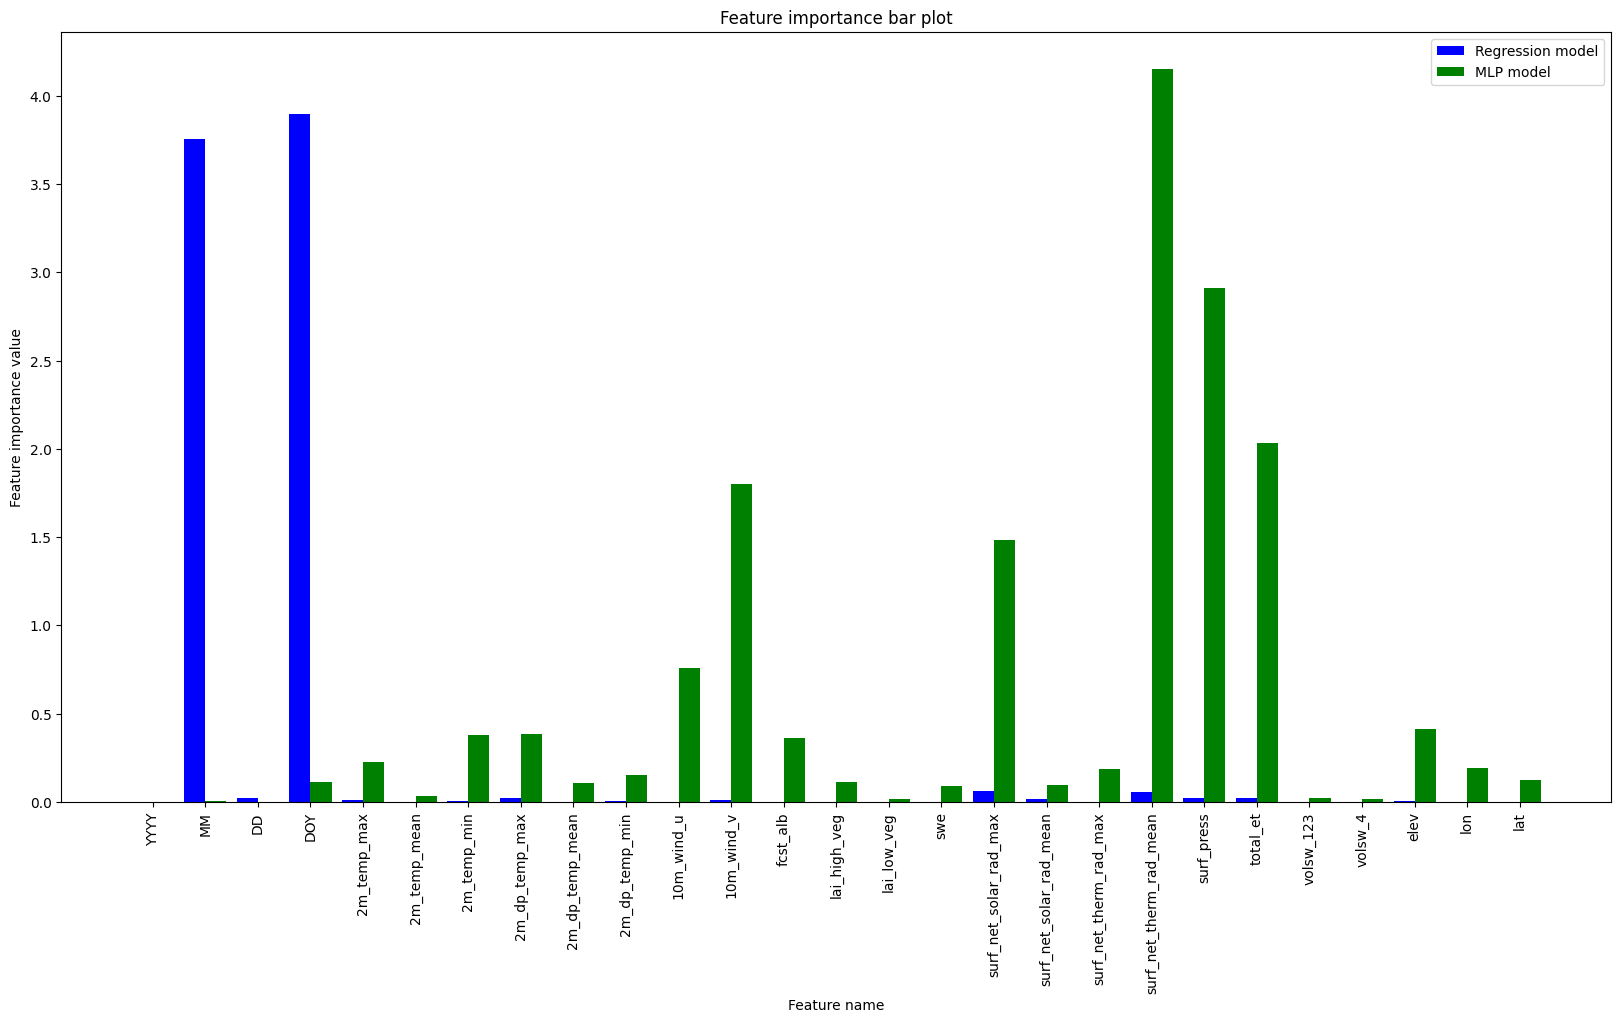

In [102]:
import matplotlib.pyplot as plt



# Take feature names as x axis labels from index column
time_series_rmse = regression_data.index.values

# Take feature importance values as y axis values from regression model and mlp model
regression_rmse = regression_data['normalized_importance_values']
mlp_rmse = mlp_data['normalized_importance_values']

bar_width = 0.4
x_indexes = np.arange(len(time_series_rmse))

# Plot feature importance values as bar plot bars grouped by feature names
plt.figure(figsize=(20,10))
plt.bar(x_indexes - bar_width/2, regression_rmse, width=bar_width, color='b', align='center')
plt.bar(x_indexes + bar_width/2, mlp_rmse, width=bar_width, color='g', align='center')
plt.xlabel('Feature name')
plt.ylabel('Feature importance value')
plt.xticks(ticks=x_indexes, labels=time_series_rmse, rotation=90)
plt.title('Feature importance bar plot')
# Add legend
plt.legend(['Regression model', 'MLP model'])
plt.show()

# Plot RMSE 

4.610456081485749 0.934818704250049 0.914403360042106


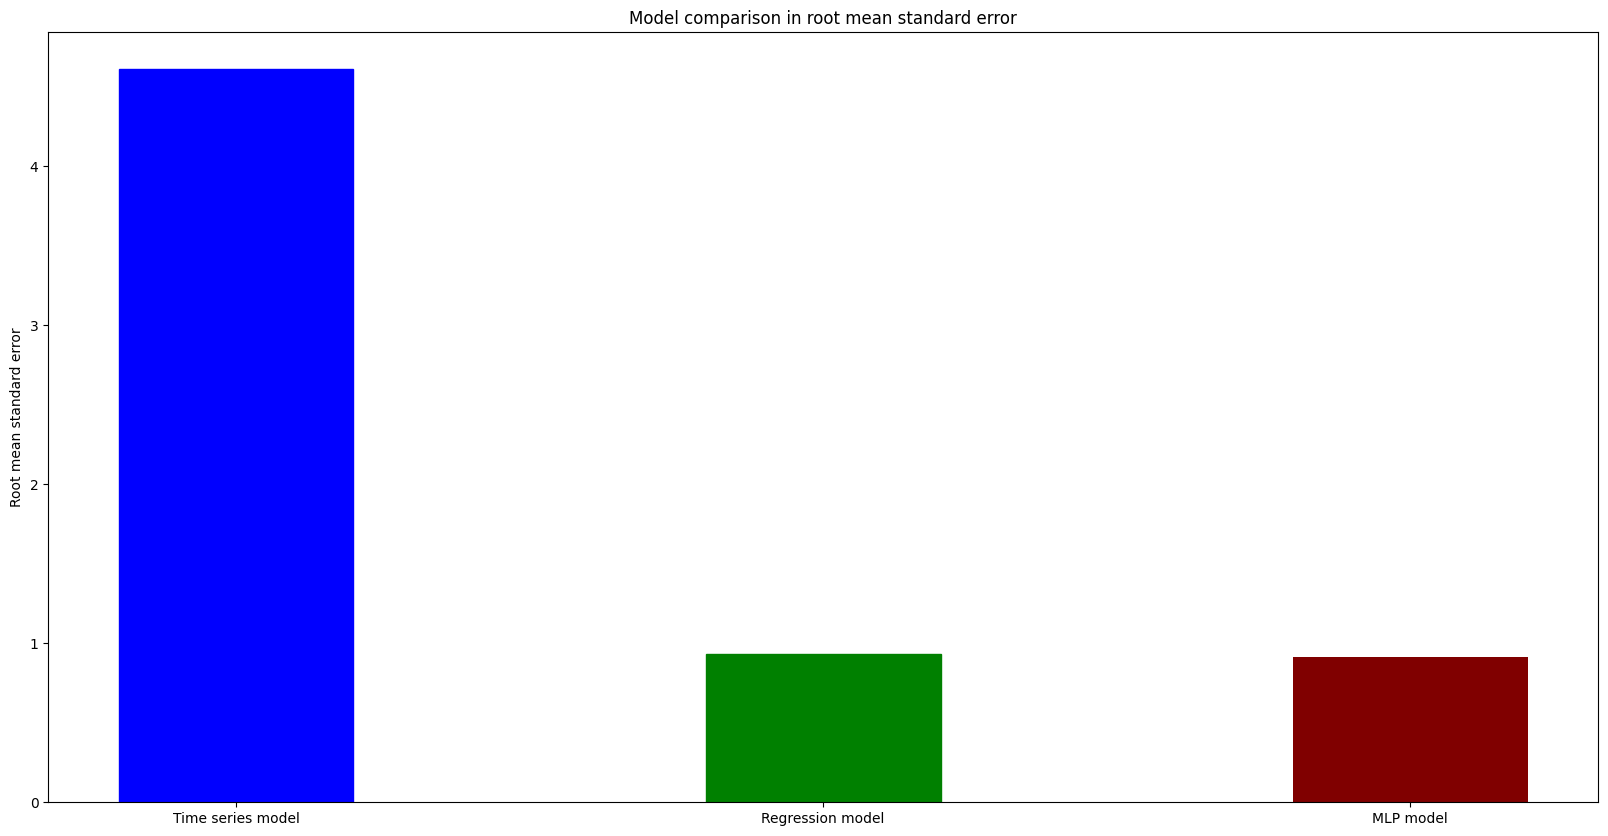

In [117]:
import matplotlib.pyplot as plt



# Take feature importance values as y axis values from regression model and mlp model
time_series_rmse = time_series_data.index.values[0]
regression_rmse = regression_data.loc['DD','rmse']
mlp_rmse = mlp_data.loc['DD', 'rmse']

print(time_series_rmse,regression_rmse,mlp_rmse)

rmse_data = {'Time series model':time_series_rmse, 'Regression model':regression_rmse, 'MLP model':mlp_rmse}

models = list(rmse_data.keys())
values = list(rmse_data.values())

# Plot feature importance values as bar plot bars grouped by feature names
plt.figure(figsize=(20,10))
# creating the bar plot
barlist = plt.bar(models, values, color ='maroon',
        width = 0.4)
barlist[0].set_color('b')
barlist[1].set_color('g')

plt.ylabel('Root mean standard error')
plt.title('Model comparison in root mean standard error')
plt.show()